In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# Load evaluation data and filter out rows where TestType is 'intelligibility'
evaluation_data = pd.read_csv('results.csv')
evaluation_data = evaluation_data[evaluation_data['TestType'] != 'intelligibility']

participant_data = pd.read_csv('participants_info.csv')

# Merge evaluation data with participant data on ParticipantID
merged_data = pd.merge(evaluation_data, participant_data, on='ParticipantID')

# Convert 'Response' column to numeric, coercing errors to NaN
merged_data['Response'] = pd.to_numeric(merged_data['Response'], errors='coerce')


In [30]:
# Group by ModelID and TestType to calculate mean scores
model_scores = merged_data.groupby(['ModelID', 'TestType'])['Response'].mean().reset_index()

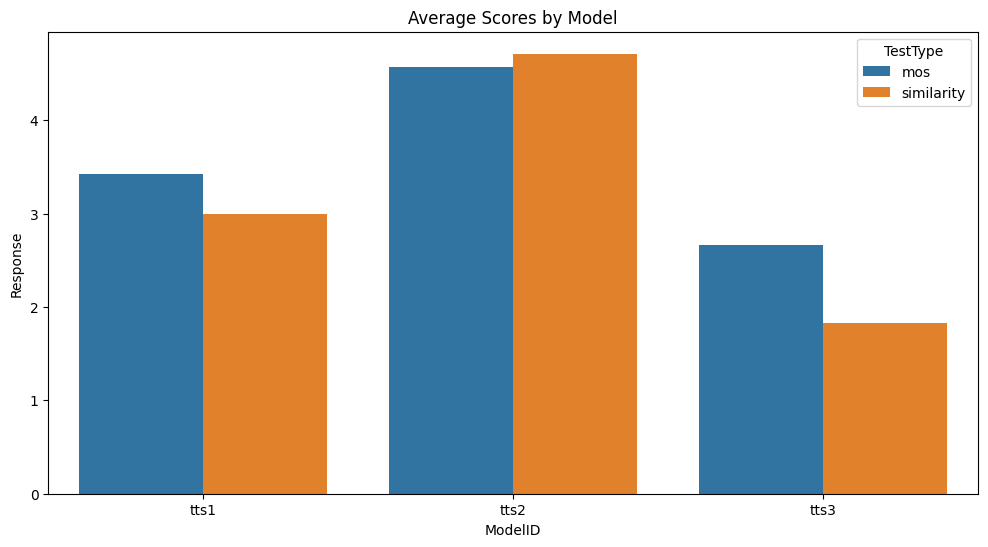

In [31]:
# Plot 1: Bar plot for average scores by model
plt.figure(figsize=(12, 6))
sns.barplot(x='ModelID', y='Response', hue='TestType', data=model_scores)
plt.title('Average Scores by Model')
plt.show()
# This plot shows the average scores (e.g., MOS, similarity) for each model, allowing comparison of model performance.

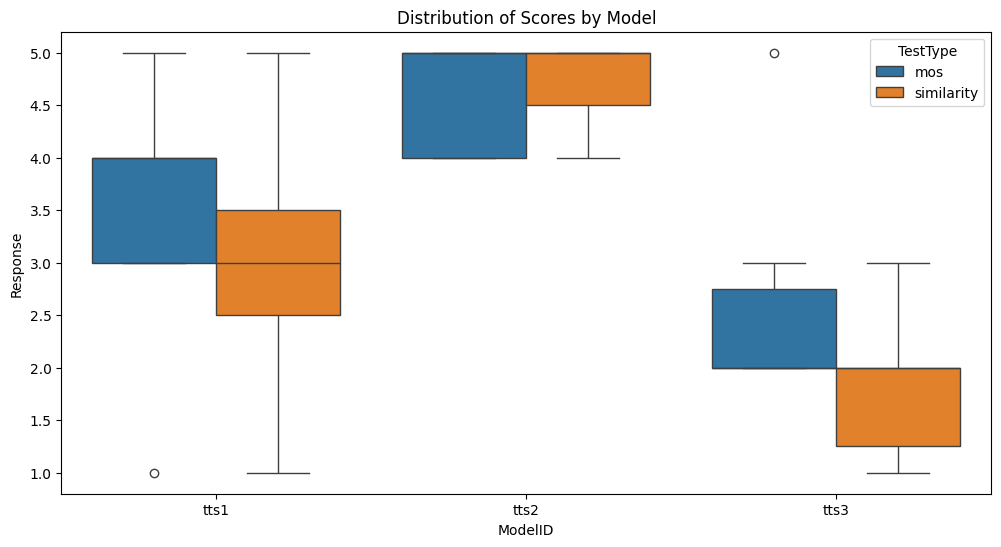

In [32]:
# Plot 2: Box plot for score distribution by model
plt.figure(figsize=(12, 6))
sns.boxplot(x='ModelID', y='Response', hue='TestType', data=merged_data)
plt.title('Distribution of Scores by Model')
plt.show()
# This plot visualizes the distribution of scores for each model, highlighting variability and potential outliers.

In [33]:
# Group by ModelID, AudioID, and TestType to calculate mean scores for each audio sample
audio_model_scores = merged_data.groupby(['ModelID', 'AudioID', 'TestType'])['Response'].mean().reset_index()

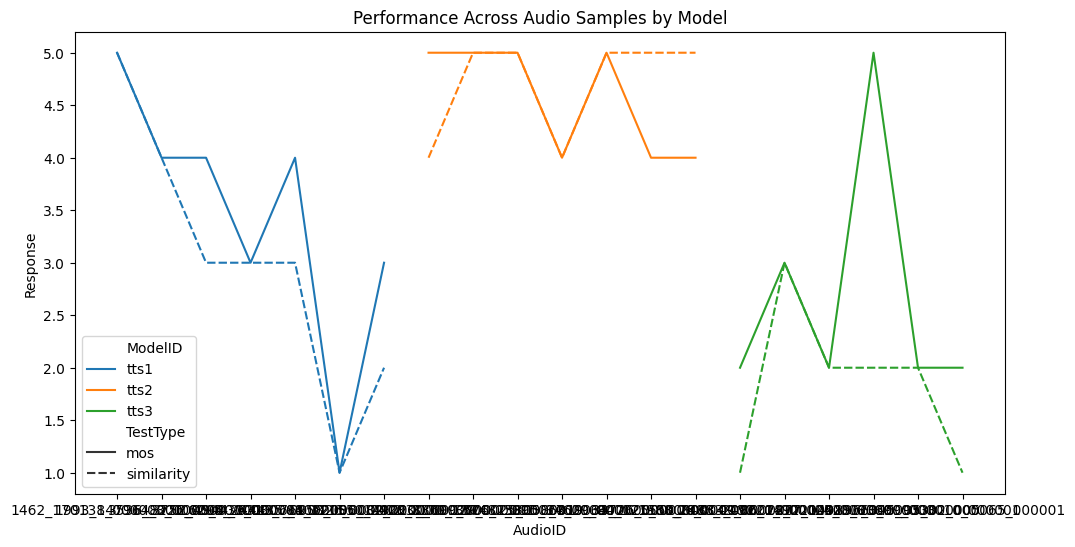

In [34]:
# Plot 3: Line plot for performance across audio samples by model
plt.figure(figsize=(12, 6))
sns.lineplot(x='AudioID', y='Response', hue='ModelID', style='TestType', data=audio_model_scores)
plt.title('Performance Across Audio Samples by Model')
plt.show()
# This plot shows how each model performs across different audio samples, highlighting trends and consistency.

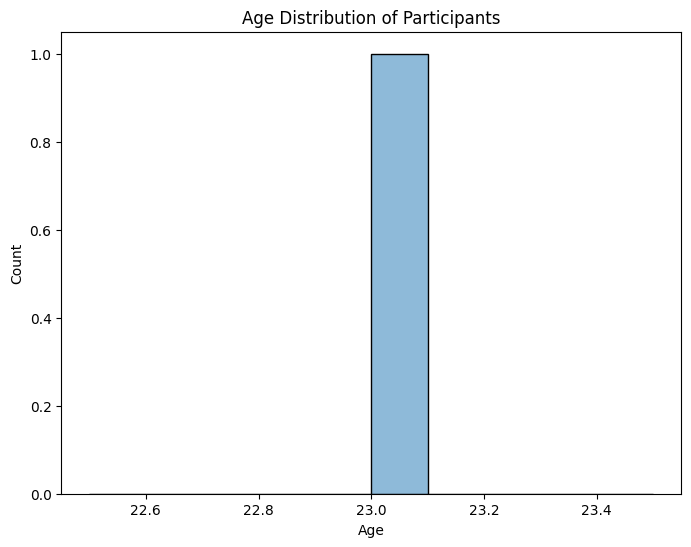

In [35]:
# Plot 4: Age distribution of participants
plt.figure(figsize=(8, 6))
sns.histplot(participant_data['Age'], bins=10, kde=True)
plt.title('Age Distribution of Participants')
plt.show()
# This plot displays the age distribution of participants, helping to understand the demographic composition.

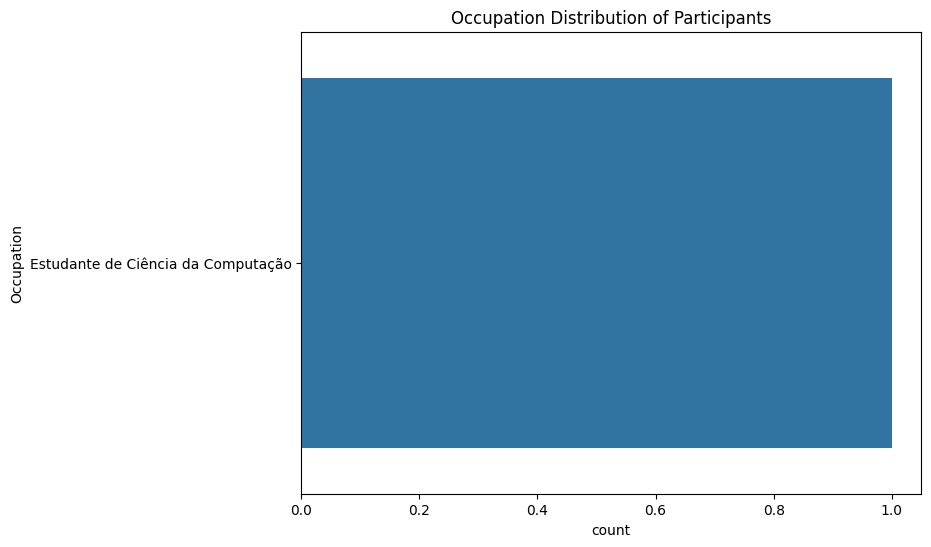

In [36]:
# Plot 5: Occupation distribution of participants
plt.figure(figsize=(8, 6))
sns.countplot(y='Occupation', data=participant_data)
plt.title('Occupation Distribution of Participants')
plt.show()
# This plot shows the distribution of participants' occupations, providing insights into their backgrounds.

In [37]:
# Pivot data to get MOS and similarity scores in columns
pivot_data = merged_data.pivot_table(index=['ParticipantID', 'AudioID', 'ModelID'], columns='TestType', values='Response').reset_index()

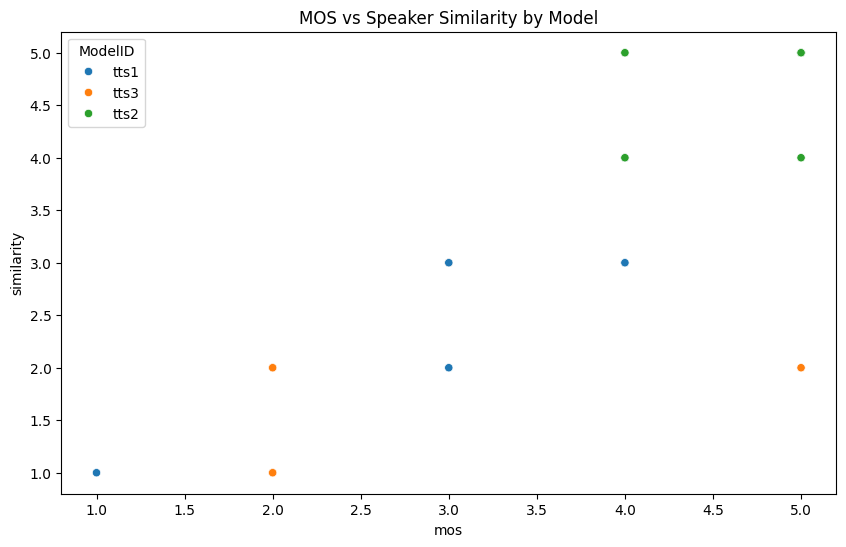

In [38]:
# Plot 6: Scatter plot for MOS vs similarity by model
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mos', y='similarity', hue='ModelID', data=pivot_data)
plt.title('MOS vs Speaker Similarity by Model')
plt.show()
# This plot explores the relationship between MOS and similarity scores for each model, identifying potential correlations.